In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import warnings
import itertools
warnings.filterwarnings('ignore')

# Data Cleaning

In [2]:
n=10
df_cleaned=pd.read_csv('current.csv').dropna(axis=1, thresh=n).fillna(method='ffill')
df_cleaned.rename(columns={'sasdate': 'Date'}, inplace=True)
df_cleaned

,Date,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,Transform:,5.000,5.0,5.000,5.000000e+00,5.00000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.00,6.00,6.00,2.0,6.00,6.00,6.0000,1.0000
1,1/1/1959,2442.158,2293.2,17.272,2.922664e+05,18235.77392,22.0151,23.3984,22.2848,31.5847,...,17.791,11.326,2.13,2.45,2.04,2.0,6476.00,12298.00,84.2043,1.0000
2,2/1/1959,2451.778,2301.5,17.452,2.944247e+05,18369.56308,22.4463,23.7142,22.4778,31.8164,...,17.798,11.343,2.14,2.46,2.05,2.0,6476.00,12298.00,83.5280,1.0000
3,3/1/1959,2467.594,2318.5,17.617,2.934187e+05,18523.05762,22.7696,23.8577,22.5882,31.8164,...,17.785,11.363,2.15,2.45,2.07,2.0,6508.00,12349.00,81.6405,1.0000
4,4/1/1959,2483.671,2334.9,17.553,2.993228e+05,18534.46600,23.2547,24.2022,22.9191,32.3184,...,17.796,11.403,2.16,2.47,2.08,2.0,6620.00,12484.00,81.8099,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,4/1/2022,17689.276,14505.4,127.483,1.551827e+06,674719.00000,104.2577,104.7645,105.4513,106.0938,...,112.134,129.204,27.60,31.75,24.82,65.2,368270.14,738195.63,5806.7228,24.4850
761,5/1/2022,17681.348,14514.6,127.570,1.541414e+06,677115.00000,104.1868,104.3400,104.8427,105.2516,...,113.511,129.780,27.84,32.14,24.94,58.4,368105.69,734917.57,5788.6879,29.1728
762,6/1/2022,17608.608,14457.8,127.830,1.536205e+06,684084.00000,104.1778,103.7981,104.3710,104.5492,...,115.940,130.639,27.91,32.27,24.96,50.0,368881.15,733048.56,5774.7859,28.2445
763,7/1/2022,17689.920,14547.5,127.723,1.545452e+06,681300.00000,104.7189,104.3207,104.8760,104.8974,...,115.334,130.692,28.03,32.40,25.06,51.5,370204.88,733732.67,5776.7132,24.5288


In [3]:
class MacroDataProcess:
    # Stationarity transofrmation
    # Add lag of the features

    def __init__(self,macro_data):
        self.data =macro_data
        self.transformation_codes = None

    def transform(self, df_col, code):
        """
        Transforms each column of dataframe (df_col) according to code

        """
        if code == 1:
            df_col.apply(lambda x: x)
            return df_col
        elif code == 2:
            df_col = df_col.diff()
            return df_col
        elif code == 3:
            df_col = df_col.diff(periods=2)
            return df_col
        elif code == 4:
            df_col = df_col.apply(np.log)
            return df_col
        elif code == 5:
            df_col = df_col.apply(np.log)
            df_col = df_col.diff(periods=2)
            return df_col
        elif code == 6:
            df_col = df_col.apply(np.log)
            df_col = df_col.diff(periods=2)
            return df_col
        elif code == 7:
            df_col = df_col.pct_change()
            df_col = df_col.diff()
            return df_col

    def stationarity(self):
        """
        Clean macro dataset and perform necessary changes
        """
        # Keep transformation codes for each variable in a dictionary 
        transformation_codes = {}
        df_tmp=pd.DataFrame(columns = self.data.columns)
        for col in self.data.columns:
            df_tmp[col]= self.data[col].iloc[1:] 
            transformation_codes[col] = self.data[col].iloc[0]
        df_tmp['Date'] = pd.to_datetime(df_tmp['Date'])

        self.data=df_tmp
        self.tansformation_codes = transformation_codes
        # Make each feature stationary 
        data_transformed: DataFrame = pd.DataFrame(columns=self.data.columns)
        for col in self.data.columns:
            if col == 'Date':
                data_transformed[col] = self.data[col]
            else:
                data_transformed[col] = self.transform(self.data[col], transformation_codes[col])
        self.data = data_transformed

    def add_lag(self,lag_values):
        for col in self.data.drop(['Date'], axis=1):
            for n in lag_values:
                self.data['{} {}M lag'.format(col, n)] = self.data[col].shift(n).ffill().values
        self.data.dropna(axis=0, inplace=True)
        return self.data

In [4]:
df = MacroDataProcess(macro_data = df_cleaned)
df.stationarity()
lag_values = [1,3,6,9,12]
df_macro= df.add_lag(lag_values)

In [5]:
df_macro=df_macro.set_index('Date')
df_macro


,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,INVEST 1M lag,INVEST 3M lag,INVEST 6M lag,INVEST 9M lag,INVEST 12M lag,VIXCLSx 1M lag,VIXCLSx 3M lag,VIXCLSx 6M lag,VIXCLSx 9M lag,VIXCLSx 12M lag
Date,,,,,,,,,,,,,,,,,,,,,
1960-03-01,0.003051,0.001833,0.018375,-0.013655,0.002594,-0.017956,-0.009113,-0.004586,-0.010303,-0.033820,...,-0.037926,-0.000688,-0.027018,-0.038791,-0.030921,1.0000,1.0000,1.0000,1.0000,1.0000
1960-04-01,0.005328,0.004530,0.029396,-0.018200,0.024801,-0.016979,-0.001141,0.000000,0.008030,-0.021152,...,-0.053379,-0.005654,-0.014082,-0.021701,-0.020784,1.0000,1.0000,1.0000,1.0000,1.0000
1960-05-01,0.005819,0.006057,-0.004988,-0.021704,0.010857,-0.009103,0.007979,0.008011,0.012578,0.008267,...,-0.025753,-0.037926,-0.013266,-0.017855,-0.011197,1.0000,1.0000,1.0000,1.0000,1.0000
1960-06-01,0.003189,0.002195,-0.020563,-0.022945,-0.016411,-0.013795,-0.005726,-0.004602,-0.001143,-0.001192,...,0.002181,-0.053379,-0.000688,-0.027018,-0.038791,1.0000,1.0000,1.0000,1.0000,1.0000
1960-07-01,0.002618,0.001653,0.001812,0.001729,-0.011463,-0.016127,-0.017175,-0.017252,-0.016038,-0.049437,...,-0.004001,-0.025753,-0.005654,-0.014082,-0.021701,1.0000,1.0000,1.0000,1.0000,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,-0.002860,-0.001474,0.004497,-0.013289,0.018546,0.013121,0.013329,0.017742,0.015329,0.050640,...,0.007067,0.028465,0.031448,0.022854,0.042838,26.9368,22.9143,17.7838,17.5754,17.1684
2022-05-01,0.000788,0.002276,0.002268,-0.008152,0.010626,0.005921,0.006117,0.007460,0.005365,-0.005634,...,-0.000460,0.022906,0.032138,0.020365,0.043040,24.4850,26.1429,19.1586,17.0618,19.1336
2022-06-01,-0.004571,-0.003287,0.002718,-0.010118,0.013784,-0.000767,-0.009267,-0.010297,-0.014666,-0.041029,...,-0.003999,0.007067,0.024882,0.024011,0.036843,29.1728,26.9368,21.2985,19.7806,16.9236


#  Data manipulation

* https://fred.stlouisfed.org/series/USRECD
* https://research.stlouisfed.org/econ/mccracken/fred-databases/

In [6]:
from fredapi import Fred
key=''

fred = Fred(api_key=key)

df_regime=pd.DataFrame(fred.get_series('USRECD'),columns=['Regime'])

df_regime.head()

,Regime
1854-12-01,1.0
1854-12-02,1.0
1854-12-03,1.0
1854-12-04,1.0
1854-12-05,1.0


In [8]:
forecast_windows=2

df=pd.concat([df_macro,df_regime],axis=1).dropna()

df['y']=df['Regime'].shift(-forecast_windows)
df.tail()

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,INVEST 6M lag,INVEST 9M lag,INVEST 12M lag,VIXCLSx 1M lag,VIXCLSx 3M lag,VIXCLSx 6M lag,VIXCLSx 9M lag,VIXCLSx 12M lag,Regime,y
2022-04-01,-0.002860,-0.001474,0.004497,-0.013289,0.018546,0.013121,0.013329,0.017742,0.015329,0.050640,...,0.031448,0.022854,0.042838,26.9368,22.9143,17.7838,17.5754,17.1684,0.0,0.0
2022-05-01,0.000788,0.002276,0.002268,-0.008152,0.010626,0.005921,0.006117,0.007460,0.005365,-0.005634,...,0.032138,0.020365,0.043040,24.4850,26.1429,19.1586,17.0618,19.1336,0.0,0.0
2022-06-01,-0.004571,-0.003287,0.002718,-0.010118,0.013784,-0.000767,-0.009267,-0.010297,-0.014666,-0.041029,...,0.024882,0.024011,0.036843,29.1728,26.9368,21.2985,19.7806,16.9236,0.0,0.0
2022-07-01,0.000485,0.002264,0.001199,0.002616,0.006162,0.005094,-0.000185,0.000318,-0.003371,0.004384,...,0.028465,0.031448,0.022854,28.2445,24.4850,22.9143,17.7838,17.5754,0.0,NaN
2022-08-01,0.005035,0.006859,0.000180,0.006001,-0.001160,0.003532,0.005961,0.006782,0.001723,0.020631,...,0.022906,0.032138,0.020365,24.5288,29.1728,26.1429,19.1586,17.0618,0.0,NaN


In [9]:
split_date = '2006-01-01' # train and test set split date
df_train, df_test = df[df.index < split_date], df[df.index>= split_date]
target_col = 'Regime'
feature_col = df.columns.drop(['Regime'])

# Model Fitting

In [10]:
from xgboost import XGBClassifier
import itertools
parameters={'random_state': [100],'max_depth': [5,8,10,12],'n_estimators': [100,300],'objective': ['binary:logistic'],'booster': ['gbtree']}
parameters_=list((dict(zip(parameters, x)) for x in itertools.product(*parameters.values())))

In [20]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score
from tqdm import tqdm

acc=[]
accuracy=[]
for param in tqdm(parameters_):
    tscv = TimeSeriesSplit(n_splits=2)
    model = XGBClassifier(**param)
    for train_index, test_index in tscv.split(df_train):
        X_train, X_test = df_train.iloc[train_index,:-1], df_train.iloc[test_index,:-1]
        y_train, y_test = df_train.iloc[train_index,-1:], df_train.iloc[test_index,-1:]
        model.fit(X_train, y_train)
        
        y_pr = model.predict(X_test)
        acc.append(accuracy_score(y_test.iloc[:,-1],y_pr))

    accuracy.append(np.mean(acc))

best_param = parameters_[np.argmax(accuracy)]
best_param

100%|██████████| 8/8 [00:06<00:00,  1.26it/s]


{'random_state': 100,
 'max_depth': 8,
 'n_estimators': 100,
 'objective': 'binary:logistic',
 'booster': 'gbtree'}

In [23]:
model = XGBClassifier(**best_param)
proba=[]
for i in tqdm(range(len(df_train),len(df))):
    X=df.iloc[:i-forecast_windows+1,:-1]
    y=df.iloc[:i-forecast_windows+1,-1:]
    model = model.fit(X, y)
    proba.append(model.predict(df.iloc[i:i+1,:-1]))

100%|██████████| 200/200 [01:09<00:00,  2.90it/s]


In [24]:
plt.style.use("dark_background")

In [31]:
pred_df=pd.DataFrame(np.concatenate(proba),index=df_test.index)
pred_df=pd.concat([pred_df,df_test.iloc[forecast_windows:,-1]],axis=1)
pred_df['2009']

,0,y
2009-01-01,1,1.0
2009-02-01,1,1.0
2009-03-01,1,1.0
2009-04-01,1,1.0
2009-05-01,0,0.0
2009-06-01,0,0.0
2009-07-01,0,0.0
2009-08-01,0,0.0
2009-09-01,0,0.0
2009-10-01,0,0.0


In [33]:
pred_df[0].to_csv('recession.csv')

In [15]:
pred_df.columns=['1 month ahead','2 month ahead','Actual']

In [16]:
pred_df.to_csv('recession.csv')

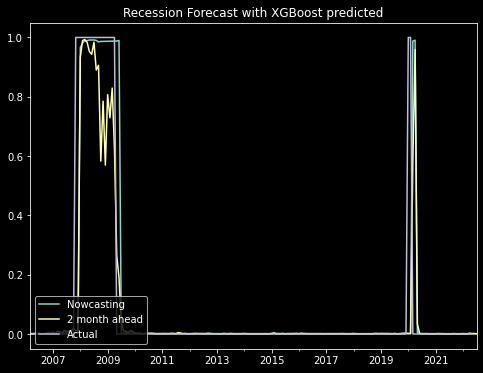

In [17]:
pred_df.plot(figsize=(8,6))
plt.title('Recession Forecast with XGBoost predicted')
plt.legend(loc='lower left')
plt.show()

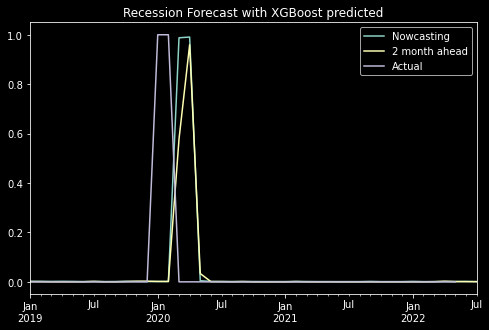

In [18]:

pred_df['2019':].plot(figsize=(8,5))
plt.title('Recession Forecast with XGBoost predicted')
plt.show()

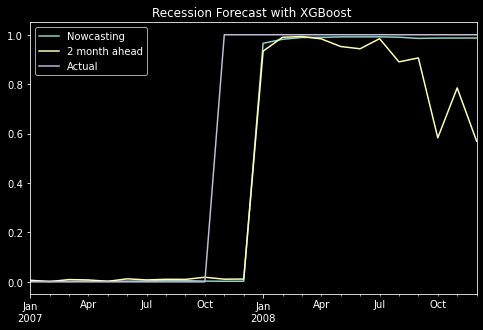

In [19]:
pred_df['2007':'2008'].plot(figsize=(8,5))
plt.title('Recession Forecast with XGBoost ')
plt.show()

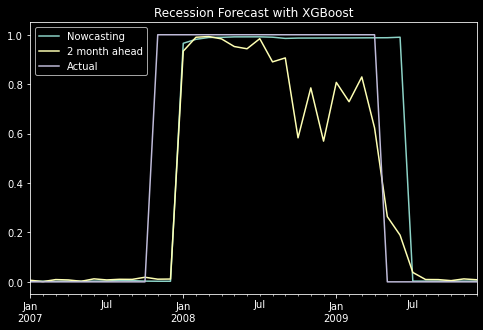

In [20]:
pred_df['2007':'2009'].plot(figsize=(8,5))
plt.title('Recession Forecast with XGBoost')
plt.show()